<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NY-State-Hate-Crimes-data" data-toc-modified-id="NY-State-Hate-Crimes-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NY State Hate Crimes data</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-&amp;-data" data-toc-modified-id="Import-libraries-&amp;-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries &amp; data</a></span></li><li><span><a href="#Initial-high-level-examination-of-data" data-toc-modified-id="Initial-high-level-examination-of-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Initial high level examination of data</a></span></li><li><span><a href="#Dropping-columns-of-0s" data-toc-modified-id="Dropping-columns-of-0s-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dropping columns of 0s</a></span><ul class="toc-item"><li><span><a href="#Note:-To-be-clear,-Counts-are-numbers-of-incidents" data-toc-modified-id="Note:-To-be-clear,-Counts-are-numbers-of-incidents-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Note: To be clear, Counts are numbers of incidents</a></span></li></ul></li><li><span><a href="#Hate-Crimes-by-NY-County-plot" data-toc-modified-id="Hate-Crimes-by-NY-County-plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Hate Crimes by NY County plot</a></span></li></ul></li><li><span><a href="#Country,-year,-crime-type-dummy-variables" data-toc-modified-id="Country,-year,-crime-type-dummy-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Country, year, crime type dummy variables</a></span></li><li><span><a href="#Modeling----predicting-w/regression-Anti-Gay-Male-crime" data-toc-modified-id="Modeling----predicting-w/regression-Anti-Gay-Male-crime-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling -- predicting w/regression Anti-Gay Male crime</a></span><ul class="toc-item"><li><span><a href="#Creating-x/y-test/train-split" data-toc-modified-id="Creating-x/y-test/train-split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating x/y test/train split</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree Regression</a></span><ul class="toc-item"><li><span><a href="#Residiuals-plot----DT-Regressor" data-toc-modified-id="Residiuals-plot----DT-Regressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Residiuals plot -- DT Regressor</a></span></li></ul></li><li><span><a href="#AdaBoostRegressor" data-toc-modified-id="AdaBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>AdaBoostRegressor</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Deep Learning</a></span></li><li><span><a href="#Kerasregressor-(Source:-https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/-)" data-toc-modified-id="Kerasregressor-(Source:-https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/-)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kerasregressor (Source: <a href="https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/" target="_blank">https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/</a> )</a></span><ul class="toc-item"><li><span><a href="#Wide-chungus-model" data-toc-modified-id="Wide-chungus-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Wide chungus model</a></span></li></ul></li><li><span><a href="#Grid-chungus-search" data-toc-modified-id="Grid-chungus-search-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Grid chungus search</a></span></li></ul></div>

# NY State Hate Crimes data
## Import libraries & data

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import missingno as msno 
import yellowbrick 

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [72]:
from sklearn.model_selection import GridSearchCV

In [2]:
from yellowbrick.style import set_palette
set_palette('flatui')
sns.set_context("poster")
# plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("hate-crimes-by-county-and-bias-type-beginning-2010.csv")

df.head(20)

,County,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
0,Albany,2016,Crimes Against Persons,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,3,4,3
1,Albany,2016,Property Crimes,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,3,3,3
2,Allegany,2016,Property Crimes,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
3,Bronx,2016,Crimes Against Persons,0,0,4,0,0,1,0,...,8,1,0,0,0,0,0,20,20,25
4,Bronx,2016,Property Crimes,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,2,2
5,Broome,2016,Crimes Against Persons,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,3,3,3
6,Cayuga,2016,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
7,Chemung,2016,Crimes Against Persons,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
8,Chemung,2016,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
9,Chenango,2016,Crimes Against Persons,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,2,2


## Initial high level examination of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   County                                        423 non-null    object
 1   Year                                          423 non-null    int64 
 2   Crime Type                                    423 non-null    object
 3   Anti-Male                                     423 non-null    int64 
 4   Anti-Female                                   423 non-null    int64 
 5   Anti-Transgender                              423 non-null    int64 
 6   Anti-Gender Identity Expression               423 non-null    int64 
 7   Anti-Age*                                     423 non-null    int64 
 8   Anti-White                                    423 non-null    int64 
 9   Anti-Black                                    423 non-null    int64 
 10  An

In [5]:
df.nunique()

County                                          60
Year                                             7
Crime Type                                       2
Anti-Male                                        2
Anti-Female                                      2
Anti-Transgender                                 5
Anti-Gender Identity Expression                  4
Anti-Age*                                        5
Anti-White                                       9
Anti-Black                                      14
Anti-American Indian/Alaskan Native              2
Anti-Asian                                       7
Anti-Native Hawaiian/Pacific Islander            1
Anti-Multi-Racial Groups                         4
Anti-Other Race                                  1
Anti-Jewish                                     35
Anti-Catholic                                    9
Anti-Protestant                                  2
Anti-Islamic (Muslim)                           10
Anti-Multi-Religious Groups    

## Dropping columns of 0s

In [6]:
df = df.drop(columns=['Anti-Native Hawaiian/Pacific Islander','Anti-Other Race','Anti-Atheism/Agnosticism',
                      'Anti-Buddhist','Anti-Jehovahs Witness','Anti-Mormon','Anti-Sikh','Anti-Non-Hispanic*'],axis=1)

In [7]:
df.nunique()

County                                          60
Year                                             7
Crime Type                                       2
Anti-Male                                        2
Anti-Female                                      2
Anti-Transgender                                 5
Anti-Gender Identity Expression                  4
Anti-Age*                                        5
Anti-White                                       9
Anti-Black                                      14
Anti-American Indian/Alaskan Native              2
Anti-Asian                                       7
Anti-Multi-Racial Groups                         4
Anti-Jewish                                     35
Anti-Catholic                                    9
Anti-Protestant                                  2
Anti-Islamic (Muslim)                           10
Anti-Multi-Religious Groups                      5
Anti-Religious Practice Generally                3
Anti-Other Religion            

### Note: To be clear, Counts are numbers of incidents

In [8]:
df['Anti-Male'].value_counts()

0    420
1      3
Name: Anti-Male, dtype: int64

In [9]:
df['Anti-Female'].value_counts()

0    416
1      7
Name: Anti-Female, dtype: int64

In [10]:
df['Anti-Age*'].value_counts()

0    414
1      6
9      1
5      1
2      1
Name: Anti-Age*, dtype: int64

## Hate Crimes by NY County plot

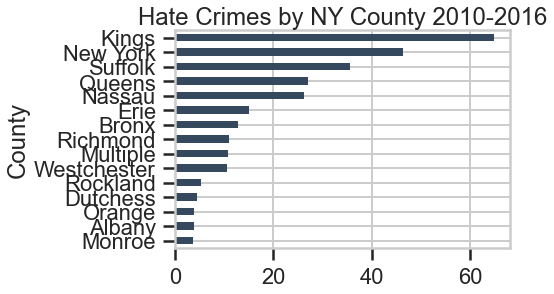

In [11]:
x = df.groupby('County')['Total Incidents'].mean().sort_values().tail(15)
x.plot(kind='barh')
ax = plt.gca()
ax.set_title("Hate Crimes by NY County 2010-2016")
fig = plt.gcf()
fig.savefig('top_15_counties_hc.png')

In [12]:
df.columns

Index(['County', 'Year', 'Crime Type', 'Anti-Male', 'Anti-Female',
       'Anti-Transgender', 'Anti-Gender Identity Expression', 'Anti-Age*',
       'Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Multi-Racial Groups', 'Anti-Jewish',
       'Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Religious Practice Generally',
       'Anti-Other Religion', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Other Christian', 'Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Gay Male',
       'Anti-Gay Female', 'Anti-Gay (Male and Female)', 'Anti-Heterosexual',
       'Anti-Bisexual', 'Anti-Physical Disability', 'Anti-Mental Disability',
       'Total Incidents', 'Total Victims', 'Total Offenders'],
      dtype='object')

# Country, year, crime type dummy variables

In [13]:
df = pd.get_dummies(df, columns=['County', 'Year',"Crime Type"], prefix='', prefix_sep='') 

df.columns

Index(['Anti-Male', 'Anti-Female', 'Anti-Transgender',
       'Anti-Gender Identity Expression', 'Anti-Age*', 'Anti-White',
       'Anti-Black', 'Anti-American Indian/Alaskan Native', 'Anti-Asian',
       'Anti-Multi-Racial Groups',
       ...
       'Westchester', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Crimes Against Persons', 'Property Crimes'],
      dtype='object', length=102)

# Modeling -- predicting w/regression Anti-Gay Male crime

## Creating x/y test/train split

In [44]:
X = df.drop("Anti-Gay Male", axis=1)
# X = X.drop(columns=['Total Incidents', 'Total Victims', 'Total Offenders'],axis=1)
y = df['Anti-Gay Male']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [17]:
y_pred = regressor.predict(X_test)
# pred_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# pred_df

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.8352941176470589
Mean Squared Error: 2.6705882352941175
Root Mean Squared Error: 1.6341934510008653
R2 Score 0.5467465351186283


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01631
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00013
Feature: 6, Score: 0.02542
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.11246
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00116
Feature: 11, Score: 0.00637
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01407
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00462
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00073
Feature: 20, Score: 0.00120
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00404
Feature: 23, Score: 0.00020
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01646
Feature: 30, Score: 0.00708
Feature: 31, Score: 0.68233
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

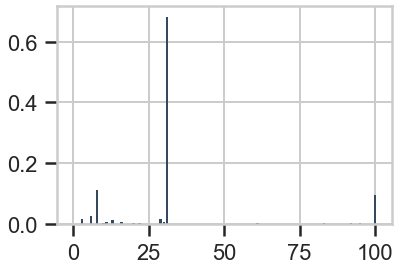

In [19]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
#doesn't say much
X_train.columns[31]

'Total Offenders'

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

def select_features(X_train, y_train, X_test,max_features):
# configure to select a subset of features
    fs = SelectFromModel(DecisionTreeRegressor(random_state=0), max_features=max_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 20)
# fit the model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.8740196078431371
Mean Squared Error: 3.1776102941176467
Root Mean Squared Error: 1.7825852838272975
R2 Score 0.46069451785294835


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.7530588235294117
Mean Squared Error: 2.24262
Root Mean Squared Error: 1.4975379794849946
R2 Score 0.6193815010570826


In [24]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 100)
# fit the model
model = RandomForestRegressor(random_state=0)
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.7750993480789284
Mean Squared Error: 2.2897495684585465
Root Mean Squared Error: 1.5131918478694453
R2 Score 0.6113826489989901


### Residiuals plot -- DT Regressor

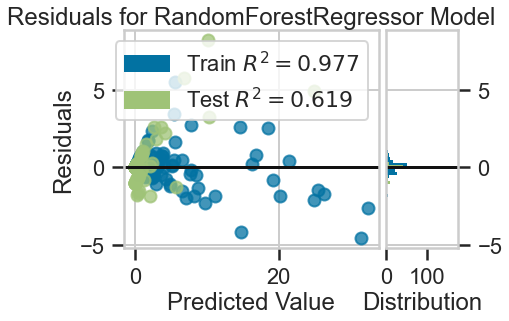

In [25]:
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(random_state=0), X_train, y_train, X_test, y_test)

## AdaBoostRegressor

In [26]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=1000)
regr.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.7530588235294117
Mean Squared Error: 2.24262
Root Mean Squared Error: 1.4975379794849946
R2 Score 0.6193815010570826


## Lasso

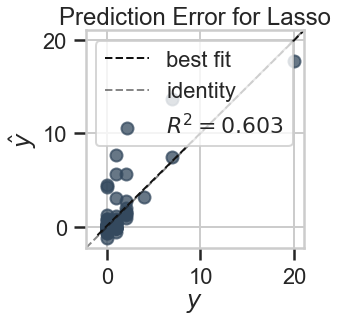

In [27]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import prediction_error

# Instantiate the linear model and visualizer
model = Lasso(random_state=0)
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

## Elastic Net

In [28]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0,max_iter=2000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.6944465739093058
Mean Squared Error: 1.3587349714052341
Root Mean Squared Error: 1.1656478762496134
R2 Score 0.7693948750668824


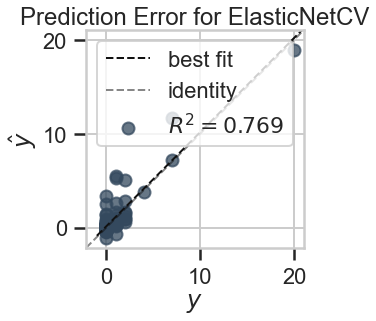

In [29]:
visualizer = prediction_error(regr, X_train, y_train, X_test, y_test)

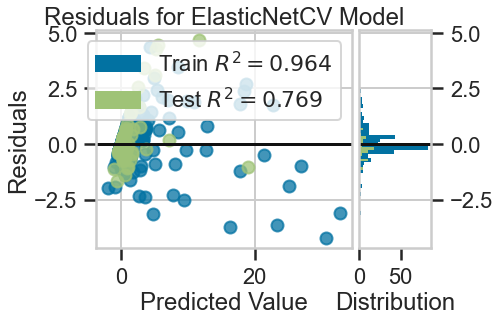

In [30]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(regr, X_train, y_train, X_test, y_test)

# Deep Learning

In [46]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers.experimental import preprocessing

from numpy import sqrt
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [48]:
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mae')
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=10)
# fit the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1,validation_split=0.3, callbacks=[es])

Train on 236 samples, validate on 102 samples
Epoch 1/500
236/236 [==============================] - 0s 2ms/sample - loss: 1.8012 - val_loss: 1.6483
Epoch 2/500
236/236 [==============================] - 0s 83us/sample - loss: 1.7438 - val_loss: 1.6159
Epoch 3/500
236/236 [==============================] - 0s 86us/sample - loss: 1.7169 - val_loss: 1.6030
Epoch 4/500
236/236 [==============================] - 0s 85us/sample - loss: 1.7026 - val_loss: 1.5963
Epoch 5/500
236/236 [==============================] - 0s 95us/sample - loss: 1.6942 - val_loss: 1.5903
Epoch 6/500
236/236 [==============================] - 0s 105us/sample - loss: 1.6865 - val_loss: 1.5841
Epoch 7/500
236/236 [==============================] - 0s 91us/sample - loss: 1.6784 - val_loss: 1.5782
Epoch 8/500
236/236 [==============================] - 0s 108us/sample - loss: 1.6710 - val_loss: 1.5724
Epoch 9/500
236/236 [==============================] - 0s 100us/sample - loss: 1.6637 - val_loss: 1.5662
Epoch 10/500
236

236/236 [==============================] - 0s 88us/sample - loss: 0.7495 - val_loss: 0.8999
Epoch 79/500
236/236 [==============================] - 0s 73us/sample - loss: 0.7406 - val_loss: 0.8938
Epoch 80/500
236/236 [==============================] - 0s 88us/sample - loss: 0.7276 - val_loss: 0.8851
Epoch 81/500
236/236 [==============================] - 0s 75us/sample - loss: 0.7153 - val_loss: 0.8797
Epoch 82/500
236/236 [==============================] - 0s 83us/sample - loss: 0.7065 - val_loss: 0.8713
Epoch 83/500
236/236 [==============================] - 0s 88us/sample - loss: 0.6958 - val_loss: 0.8637
Epoch 84/500
236/236 [==============================] - 0s 84us/sample - loss: 0.6869 - val_loss: 0.8578
Epoch 85/500
236/236 [==============================] - 0s 78us/sample - loss: 0.6814 - val_loss: 0.8538
Epoch 86/500
236/236 [==============================] - 0s 92us/sample - loss: 0.6757 - val_loss: 0.8492
Epoch 87/500
236/236 [==============================] - 0s 87us/samp

In [49]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 0.858, RMSE: 0.926


In [52]:
y_test.mean()

0.8823529411764706

In [50]:
X_test

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

# Kerasregressor (Source: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/ )

In [53]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [54]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [57]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, scoring="r2", cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) R2" % (results.mean(), results.std()))

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/1
34/34 [==============================] - 0s 6ms/step
Epoch 1/1
34/34 [==============================] - 0s 7ms/step
Epoch 1/1
34/34 [==============================] - 0s 7ms/step
Epoch 1/1
34/34 [==============================] - 0s 7ms/step
Epoch 1/1
34/34 [==============================] - 0s 8ms/step
Epoch 1/1
34/34 [==============================] - 0s 8ms/step
Epoch 1/1
34/34 [==============================] - 0s 9ms/step
Epoch 1/1
34/34 [==============================] - 0s 9ms/step
Epoch 1/1
33/33 [==============================] - 0s 10ms/step
Epoch 1/1
33/33 [==============================] - 0s 10ms/step
Results: -0.16 (0.09) MSE


In [59]:
# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [66]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', mm_scaler))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, scoring="r2", cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) R2" % (results.mean(), results.std()))

Epoch 1/100
304/304 [==============================] - 2s 6ms/step - loss: 23.8568
Epoch 2/100
304/304 [==============================] - 0s 238us/step - loss: 23.3055
Epoch 3/100
304/304 [==============================] - 0s 228us/step - loss: 21.5314
Epoch 4/100
304/304 [==============================] - 0s 228us/step - loss: 18.7430
Epoch 5/100
304/304 [==============================] - 0s 227us/step - loss: 16.0408
Epoch 6/100
304/304 [==============================] - 0s 230us/step - loss: 13.8680
Epoch 7/100
304/304 [==============================] - 0s 222us/step - loss: 11.9819
Epoch 8/100
304/304 [==============================] - 0s 227us/step - loss: 10.3288
Epoch 9/100
304/304 [==============================] - 0s 232us/step - loss: 8.7670
Epoch 10/100
304/304 [==============================] - 0s 227us/step - loss: 7.4083
Epoch 11/100
304/304 [==============================] - 0s 232us/step - loss: 6.2886
Epoch 12/100
304/304 [==============================] - 0s 226us/ste

304/304 [==============================] - 0s 227us/step - loss: 0.2955
Epoch 98/100
304/304 [==============================] - 0s 222us/step - loss: 0.3050
Epoch 99/100
304/304 [==============================] - 0s 223us/step - loss: 0.2939
Epoch 100/100
34/34 [==============================] - 1s 22ms/step
Epoch 1/100
304/304 [==============================] - 2s 7ms/step - loss: 19.6296
Epoch 2/100
304/304 [==============================] - 0s 236us/step - loss: 19.4383
Epoch 3/100
304/304 [==============================] - 0s 238us/step - loss: 19.0065
Epoch 4/100
304/304 [==============================] - 0s 242us/step - loss: 18.1112
Epoch 5/100
304/304 [==============================] - 0s 231us/step - loss: 16.8064
Epoch 6/100
304/304 [==============================] - 0s 227us/step - loss: 15.3598
Epoch 7/100
304/304 [==============================] - 0s 227us/step - loss: 13.9159
Epoch 8/100
304/304 [==============================] - 0s 237us/step - loss: 12.4587
Epoch 9/100


304/304 [==============================] - 0s 216us/step - loss: 0.6507
Epoch 93/100
304/304 [==============================] - 0s 221us/step - loss: 0.6551
Epoch 94/100
304/304 [==============================] - 0s 226us/step - loss: 0.6339
Epoch 95/100
304/304 [==============================] - 0s 224us/step - loss: 0.6392
Epoch 96/100
304/304 [==============================] - 0s 234us/step - loss: 0.6203
Epoch 97/100
304/304 [==============================] - 0s 220us/step - loss: 0.6262
Epoch 98/100
304/304 [==============================] - 0s 196us/step - loss: 0.6182
Epoch 99/100
304/304 [==============================] - 0s 212us/step - loss: 0.6139
Epoch 100/100
34/34 [==============================] - 1s 23ms/step
Epoch 1/100
304/304 [==============================] - 2s 7ms/step - loss: 23.2287
Epoch 2/100
304/304 [==============================] - 0s 254us/step - loss: 22.9286
Epoch 3/100
304/304 [==============================] - 0s 235us/step - loss: 22.0853
Epoch 4/100


Epoch 88/100
304/304 [==============================] - 0s 231us/step - loss: 0.7373
Epoch 89/100
304/304 [==============================] - 0s 209us/step - loss: 0.6765
Epoch 90/100
304/304 [==============================] - 0s 205us/step - loss: 0.6690
Epoch 91/100
304/304 [==============================] - 0s 210us/step - loss: 0.6832
Epoch 92/100
304/304 [==============================] - 0s 203us/step - loss: 0.6627
Epoch 93/100
304/304 [==============================] - 0s 214us/step - loss: 0.6630
Epoch 94/100
304/304 [==============================] - 0s 207us/step - loss: 0.6373
Epoch 95/100
304/304 [==============================] - 0s 202us/step - loss: 0.6419
Epoch 96/100
304/304 [==============================] - 0s 200us/step - loss: 0.6398
Epoch 97/100
304/304 [==============================] - 0s 212us/step - loss: 0.6282
Epoch 98/100
304/304 [==============================] - 0s 196us/step - loss: 0.6096
Epoch 99/100
304/304 [==============================] - 0s 250us/

304/304 [==============================] - 0s 255us/step - loss: 21.0274
Epoch 83/100
304/304 [==============================] - 0s 252us/step - loss: 20.9612
Epoch 84/100
304/304 [==============================] - 0s 283us/step - loss: 20.8972
Epoch 85/100
304/304 [==============================] - 0s 277us/step - loss: 20.8356
Epoch 86/100
304/304 [==============================] - 0s 309us/step - loss: 20.7725
Epoch 87/100
304/304 [==============================] - 0s 256us/step - loss: 20.7082
Epoch 88/100
304/304 [==============================] - 0s 228us/step - loss: 20.6453
Epoch 89/100
304/304 [==============================] - 0s 208us/step - loss: 20.5834
Epoch 90/100
304/304 [==============================] - 0s 210us/step - loss: 20.5218
Epoch 91/100
304/304 [==============================] - 0s 210us/step - loss: 20.4631
Epoch 92/100
304/304 [==============================] - 0s 209us/step - loss: 20.4020
Epoch 93/100
304/304 [==============================] - 0s 211us/st

304/304 [==============================] - 0s 238us/step - loss: 1.1527
Epoch 78/100
304/304 [==============================] - 0s 236us/step - loss: 1.1159
Epoch 79/100
304/304 [==============================] - 0s 234us/step - loss: 1.0894
Epoch 80/100
304/304 [==============================] - 0s 237us/step - loss: 1.0816
Epoch 81/100
304/304 [==============================] - 0s 223us/step - loss: 1.0668
Epoch 82/100
304/304 [==============================] - 0s 234us/step - loss: 1.0915
Epoch 83/100
304/304 [==============================] - 0s 232us/step - loss: 1.0618
Epoch 84/100
304/304 [==============================] - 0s 228us/step - loss: 1.0720
Epoch 85/100
304/304 [==============================] - 0s 247us/step - loss: 1.0364
Epoch 86/100
304/304 [==============================] - 0s 224us/step - loss: 1.0457
Epoch 87/100
304/304 [==============================] - 0s 240us/step - loss: 1.0481
Epoch 88/100
304/304 [==============================] - 0s 244us/step - loss: 

304/304 [==============================] - 0s 239us/step - loss: 0.8178
Epoch 73/100
304/304 [==============================] - 0s 235us/step - loss: 0.8159
Epoch 74/100
304/304 [==============================] - 0s 231us/step - loss: 0.8054
Epoch 75/100
304/304 [==============================] - 0s 228us/step - loss: 0.7741
Epoch 76/100
304/304 [==============================] - 0s 233us/step - loss: 0.7695
Epoch 77/100
304/304 [==============================] - 0s 232us/step - loss: 0.7809
Epoch 78/100
304/304 [==============================] - 0s 233us/step - loss: 0.7471
Epoch 79/100
304/304 [==============================] - 0s 232us/step - loss: 0.7220
Epoch 80/100
304/304 [==============================] - 0s 245us/step - loss: 0.7139
Epoch 81/100
304/304 [==============================] - 0s 234us/step - loss: 0.7117
Epoch 82/100
304/304 [==============================] - 0s 225us/step - loss: 0.6817
Epoch 83/100
304/304 [==============================] - 0s 231us/step - loss: 

Epoch 68/100
304/304 [==============================] - 0s 239us/step - loss: 0.8966
Epoch 69/100
304/304 [==============================] - 0s 243us/step - loss: 0.8862
Epoch 70/100
304/304 [==============================] - 0s 238us/step - loss: 0.8664
Epoch 71/100
304/304 [==============================] - 0s 240us/step - loss: 0.8671
Epoch 72/100
304/304 [==============================] - 0s 230us/step - loss: 0.8457
Epoch 73/100
304/304 [==============================] - 0s 239us/step - loss: 0.8289
Epoch 74/100
304/304 [==============================] - 0s 255us/step - loss: 0.8368
Epoch 75/100
304/304 [==============================] - 0s 233us/step - loss: 0.8182
Epoch 76/100
304/304 [==============================] - 0s 236us/step - loss: 0.8019
Epoch 77/100
304/304 [==============================] - 0s 237us/step - loss: 0.8195
Epoch 78/100
304/304 [==============================] - 0s 236us/step - loss: 0.7747
Epoch 79/100
304/304 [==============================] - 0s 236us/

304/304 [==============================] - 0s 238us/step - loss: 0.8041
Epoch 64/100
304/304 [==============================] - 0s 239us/step - loss: 0.8022
Epoch 65/100
304/304 [==============================] - 0s 241us/step - loss: 0.7602
Epoch 66/100
304/304 [==============================] - 0s 237us/step - loss: 0.7795
Epoch 67/100
304/304 [==============================] - 0s 233us/step - loss: 0.7515
Epoch 68/100
304/304 [==============================] - 0s 244us/step - loss: 0.7450
Epoch 69/100
304/304 [==============================] - 0s 241us/step - loss: 0.7176
Epoch 70/100
304/304 [==============================] - 0s 240us/step - loss: 0.6928
Epoch 71/100
304/304 [==============================] - 0s 237us/step - loss: 0.7036
Epoch 72/100
304/304 [==============================] - 0s 229us/step - loss: 0.6930
Epoch 73/100
304/304 [==============================] - 0s 251us/step - loss: 0.6613
Epoch 74/100
304/304 [==============================] - 0s 242us/step - loss: 

Epoch 59/100
305/305 [==============================] - 0s 239us/step - loss: 0.7520
Epoch 60/100
305/305 [==============================] - 0s 236us/step - loss: 0.7520
Epoch 61/100
305/305 [==============================] - 0s 233us/step - loss: 0.7259
Epoch 62/100
305/305 [==============================] - 0s 243us/step - loss: 0.7101
Epoch 63/100
305/305 [==============================] - 0s 243us/step - loss: 0.7068
Epoch 64/100
305/305 [==============================] - 0s 234us/step - loss: 0.7066
Epoch 65/100
305/305 [==============================] - 0s 254us/step - loss: 0.6676
Epoch 66/100
305/305 [==============================] - 0s 231us/step - loss: 0.6639
Epoch 67/100
305/305 [==============================] - 0s 243us/step - loss: 0.6523
Epoch 68/100
305/305 [==============================] - 0s 239us/step - loss: 0.6348
Epoch 69/100
305/305 [==============================] - 0s 236us/step - loss: 0.6240
Epoch 70/100
305/305 [==============================] - 0s 238us/

305/305 [==============================] - 0s 238us/step - loss: 1.3500
Epoch 55/100
305/305 [==============================] - 0s 241us/step - loss: 1.3518
Epoch 56/100
305/305 [==============================] - 0s 244us/step - loss: 1.3455
Epoch 57/100
305/305 [==============================] - 0s 239us/step - loss: 1.3038
Epoch 58/100
305/305 [==============================] - 0s 240us/step - loss: 1.3078
Epoch 59/100
305/305 [==============================] - 0s 240us/step - loss: 1.2622
Epoch 60/100
305/305 [==============================] - 0s 243us/step - loss: 1.2417
Epoch 61/100
305/305 [==============================] - 0s 248us/step - loss: 1.2197
Epoch 62/100
305/305 [==============================] - 0s 239us/step - loss: 1.2162
Epoch 63/100
305/305 [==============================] - 0s 237us/step - loss: 1.1959
Epoch 64/100
305/305 [==============================] - 0s 238us/step - loss: 1.1792
Epoch 65/100
305/305 [==============================] - 0s 251us/step - loss: 

In [67]:
results

array([ 0.54066901,  0.78622207,  0.91847316,  0.17235479,  0.55309903,
       -0.78461465, -0.33567552,  0.80260099, -1.53518499,  0.89834291])

## Wide chungus model

In [84]:
# define the model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mape', optimizer='adam')
    return model

In [88]:
# evaluate model with standardized dataset
k_reg= KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=1)
estimators = []
estimators.append(('standardize', mm_scaler))
estimators.append(('mlp',k_reg))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, scoring="r2", cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) R2" % (results.mean(), results.std()))

Epoch 1/100
304/304 [==============================] - 3s 10ms/step - loss: 474112.8742
Epoch 2/100
304/304 [==============================] - 0s 297us/step - loss: 104669.0272
Epoch 3/100
304/304 [==============================] - 0s 319us/step - loss: 95946.8414
Epoch 4/100
304/304 [==============================] - 0s 287us/step - loss: 106558.3423
Epoch 5/100
304/304 [==============================] - 0s 283us/step - loss: 114286.7500
Epoch 6/100
304/304 [==============================] - 0s 286us/step - loss: 203048.4618
Epoch 7/100
304/304 [==============================] - 0s 301us/step - loss: 117805.3833
Epoch 8/100
304/304 [==============================] - 0s 288us/step - loss: 88811.1133
Epoch 9/100
304/304 [==============================] - 0s 354us/step - loss: 84354.8112
Epoch 10/100
304/304 [==============================] - 0s 294us/step - loss: 103813.4847
Epoch 11/100
304/304 [==============================] - 0s 295us/step - loss: 87451.5867
Epoch 12/100
304/304 [==

304/304 [==============================] - 0s 285us/step - loss: 78818.3790
Epoch 93/100
304/304 [==============================] - 0s 306us/step - loss: 126974.3362
Epoch 94/100
304/304 [==============================] - 0s 275us/step - loss: 99768.3773
Epoch 95/100
304/304 [==============================] - 0s 270us/step - loss: 86350.0953
Epoch 96/100
304/304 [==============================] - 0s 332us/step - loss: 46472.6355
Epoch 97/100
304/304 [==============================] - 0s 298us/step - loss: 88552.7069
Epoch 98/100
304/304 [==============================] - 0s 282us/step - loss: 149406.9578
Epoch 99/100
304/304 [==============================] - 0s 279us/step - loss: 147831.0568
Epoch 100/100
34/34 [==============================] - 1s 34ms/step
Epoch 1/100
304/304 [==============================] - 3s 11ms/step - loss: 433010.3264
Epoch 2/100
304/304 [==============================] - 0s 288us/step - loss: 245429.8589
Epoch 3/100
304/304 [==============================] 

304/304 [==============================] - 0s 276us/step - loss: 104823.5339
Epoch 84/100
304/304 [==============================] - 0s 241us/step - loss: 104730.6626
Epoch 85/100
304/304 [==============================] - 0s 252us/step - loss: 100433.5120
Epoch 86/100
304/304 [==============================] - 0s 295us/step - loss: 91756.3207
Epoch 87/100
304/304 [==============================] - 0s 313us/step - loss: 122951.4677
Epoch 88/100
304/304 [==============================] - 0s 273us/step - loss: 186976.9482
Epoch 89/100
304/304 [==============================] - 0s 258us/step - loss: 123697.6596
Epoch 90/100
304/304 [==============================] - 0s 255us/step - loss: 91026.6457
Epoch 91/100
304/304 [==============================] - 0s 253us/step - loss: 125800.7413
Epoch 92/100
304/304 [==============================] - 0s 237us/step - loss: 156336.2283
Epoch 93/100
304/304 [==============================] - 0s 246us/step - loss: 151285.7505
Epoch 94/100
304/304 [===

304/304 [==============================] - 0s 274us/step - loss: 147128.9212
Epoch 75/100
304/304 [==============================] - 0s 293us/step - loss: 89192.6656
Epoch 76/100
304/304 [==============================] - 0s 291us/step - loss: 99525.4530
Epoch 77/100
304/304 [==============================] - 0s 305us/step - loss: 188305.6252
Epoch 78/100
304/304 [==============================] - 0s 278us/step - loss: 207380.2440
Epoch 79/100
304/304 [==============================] - 0s 252us/step - loss: 54764.1869
Epoch 80/100
304/304 [==============================] - 0s 281us/step - loss: 128911.6922
Epoch 81/100
304/304 [==============================] - 0s 274us/step - loss: 150068.7736
Epoch 82/100
304/304 [==============================] - 0s 256us/step - loss: 174725.2407
Epoch 83/100
304/304 [==============================] - 0s 249us/step - loss: 65780.2842
Epoch 84/100
304/304 [==============================] - 0s 250us/step - loss: 78411.5689
Epoch 85/100
304/304 [======

304/304 [==============================] - 0s 304us/step - loss: 127783.7182
Epoch 66/100
304/304 [==============================] - 0s 335us/step - loss: 90806.1049
Epoch 67/100
304/304 [==============================] - 0s 296us/step - loss: 141320.4809
Epoch 68/100
304/304 [==============================] - 0s 281us/step - loss: 140641.3756
Epoch 69/100
304/304 [==============================] - 0s 296us/step - loss: 69705.2513
Epoch 70/100
304/304 [==============================] - 0s 293us/step - loss: 92581.7212
Epoch 71/100
304/304 [==============================] - 0s 278us/step - loss: 151365.6671
Epoch 72/100
304/304 [==============================] - 0s 283us/step - loss: 118331.5321
Epoch 73/100
304/304 [==============================] - 0s 289us/step - loss: 162422.5949
Epoch 74/100
304/304 [==============================] - 0s 302us/step - loss: 119828.4774
Epoch 75/100
304/304 [==============================] - 0s 302us/step - loss: 140213.8774
Epoch 76/100
304/304 [====

304/304 [==============================] - 0s 301us/step - loss: 166872.7132
Epoch 57/100
304/304 [==============================] - 0s 319us/step - loss: 97101.4828
Epoch 58/100
304/304 [==============================] - 0s 311us/step - loss: 144293.8808
Epoch 59/100
304/304 [==============================] - 0s 303us/step - loss: 150620.6753
Epoch 60/100
304/304 [==============================] - 0s 300us/step - loss: 62507.9189
Epoch 61/100
304/304 [==============================] - 0s 292us/step - loss: 103715.0155
Epoch 62/100
304/304 [==============================] - 0s 287us/step - loss: 104387.5841
Epoch 63/100
304/304 [==============================] - 0s 286us/step - loss: 112142.5110
Epoch 64/100
304/304 [==============================] - 0s 288us/step - loss: 160519.4092
Epoch 65/100
304/304 [==============================] - 0s 289us/step - loss: 259734.4116
Epoch 66/100
304/304 [==============================] - 0s 300us/step - loss: 74253.2099
Epoch 67/100
304/304 [====

304/304 [==============================] - 0s 258us/step - loss: 147985.0746
Epoch 48/100
304/304 [==============================] - 0s 265us/step - loss: 132642.3890
Epoch 49/100
304/304 [==============================] - 0s 266us/step - loss: 96342.9540
Epoch 50/100
304/304 [==============================] - 0s 258us/step - loss: 118336.1574
Epoch 51/100
304/304 [==============================] - 0s 259us/step - loss: 105180.8369
Epoch 52/100
304/304 [==============================] - 0s 261us/step - loss: 128615.7800
Epoch 53/100
304/304 [==============================] - 0s 277us/step - loss: 90800.9391
Epoch 54/100
304/304 [==============================] - 0s 259us/step - loss: 115418.5017
Epoch 55/100
304/304 [==============================] - 0s 274us/step - loss: 95573.1465
Epoch 56/100
304/304 [==============================] - 0s 281us/step - loss: 128174.7204
Epoch 57/100
304/304 [==============================] - 0s 272us/step - loss: 106679.6895
Epoch 58/100
304/304 [====

304/304 [==============================] - 0s 300us/step - loss: 124232.2523
Epoch 39/100
304/304 [==============================] - 0s 303us/step - loss: 79835.2029
Epoch 40/100
304/304 [==============================] - 0s 285us/step - loss: 76826.3517
Epoch 41/100
304/304 [==============================] - 0s 263us/step - loss: 68609.6236
Epoch 42/100
304/304 [==============================] - 0s 262us/step - loss: 116999.4274
Epoch 43/100
304/304 [==============================] - 0s 269us/step - loss: 86895.1529
Epoch 44/100
304/304 [==============================] - 0s 289us/step - loss: 69551.5809
Epoch 45/100
304/304 [==============================] - 0s 285us/step - loss: 102381.5882
Epoch 46/100
304/304 [==============================] - 0s 279us/step - loss: 117814.1793
Epoch 47/100
304/304 [==============================] - 0s 302us/step - loss: 125564.5410
Epoch 48/100
304/304 [==============================] - 0s 325us/step - loss: 105760.0394
Epoch 49/100
304/304 [======

304/304 [==============================] - 0s 300us/step - loss: 89842.7434
Epoch 30/100
304/304 [==============================] - 0s 342us/step - loss: 133314.6477
Epoch 31/100
304/304 [==============================] - 0s 331us/step - loss: 101771.1911
Epoch 32/100
304/304 [==============================] - 0s 332us/step - loss: 131959.2227
Epoch 33/100
304/304 [==============================] - 0s 321us/step - loss: 136822.0598
Epoch 34/100
304/304 [==============================] - 0s 314us/step - loss: 113295.1010
Epoch 35/100
304/304 [==============================] - 0s 284us/step - loss: 84213.7637
Epoch 36/100
304/304 [==============================] - 0s 280us/step - loss: 114095.8672
Epoch 37/100
304/304 [==============================] - 0s 277us/step - loss: 105358.6979
Epoch 38/100
304/304 [==============================] - 0s 290us/step - loss: 116960.2292
Epoch 39/100
304/304 [==============================] - 0s 274us/step - loss: 112386.1539
Epoch 40/100
304/304 [===

305/305 [==============================] - 0s 451us/step - loss: 179733.9960
Epoch 21/100
305/305 [==============================] - 0s 475us/step - loss: 154773.5172
Epoch 22/100
305/305 [==============================] - 0s 438us/step - loss: 149728.8176
Epoch 23/100
305/305 [==============================] - 0s 379us/step - loss: 65587.0511
Epoch 24/100
305/305 [==============================] - 0s 312us/step - loss: 106550.5114
Epoch 25/100
305/305 [==============================] - 0s 301us/step - loss: 101913.6092
Epoch 26/100
305/305 [==============================] - 0s 325us/step - loss: 58836.2553
Epoch 27/100
305/305 [==============================] - 0s 307us/step - loss: 89707.8035
Epoch 28/100
305/305 [==============================] - 0s 317us/step - loss: 144545.4968
Epoch 29/100
305/305 [==============================] - 0s 356us/step - loss: 111193.5195
Epoch 30/100
305/305 [==============================] - 0s 279us/step - loss: 161152.9211
Epoch 31/100
305/305 [====

305/305 [==============================] - 0s 280us/step - loss: 102583.7845
Epoch 12/100
305/305 [==============================] - 0s 273us/step - loss: 71655.1106
Epoch 13/100
305/305 [==============================] - 0s 274us/step - loss: 117127.8465
Epoch 14/100
305/305 [==============================] - 0s 289us/step - loss: 95150.3440
Epoch 15/100
305/305 [==============================] - 0s 267us/step - loss: 158867.2806
Epoch 16/100
305/305 [==============================] - 0s 263us/step - loss: 87033.8409
Epoch 17/100
305/305 [==============================] - 0s 270us/step - loss: 209787.0113
Epoch 18/100
305/305 [==============================] - 0s 282us/step - loss: 137581.7777
Epoch 19/100
305/305 [==============================] - 0s 270us/step - loss: 68802.1425
Epoch 20/100
305/305 [==============================] - 0s 264us/step - loss: 114897.7402
Epoch 21/100
305/305 [==============================] - 0s 273us/step - loss: 107311.2467
Epoch 22/100
305/305 [=====

In [89]:
k_reg.get_params()

{'epochs': 100,
 'batch_size': 5,
 'verbose': 1,
 'build_fn': <function __main__.wider_model()>}

In [90]:
results

array([-0.1554858 , -0.12783283, -0.15017548, -0.13109225, -0.18687888,
       -0.43652475, -0.11968919, -0.13426543, -0.3135508 , -0.17197472])

# Grid chungus search

In [ ]:
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}

In [77]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
learning_rate= [0.01, 0.001, 0.0001]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(scoring="r2",estimator=KerasRegressor(build_fn=wider_model, verbose=1), param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: learning_rate is not a legal parameter